# Data Science Capstone

## Introduction

Road accidents are an everlasting issue of society since the invention of the car. One of the first car crashes in Ohio even occurred between the only two cars in the state in 1895, simply because roads were not adjusted properly to cars yet (Higgins, 2019). Ever since then, car safety has been a major selling point in the automobile industry. Car accidents simply do happen due to human or technical error. The goal therefore was to at least protect individuals involved in those crashes. But what if it would be possible to significantly reduce accidents altogether? While modern cars tend to contain a range of driver assisting tools, some companies on the forefront of it all try to implement autonomous driving, based on the fact, that computers are less prone to errors than humans. Bertoncello and Wee of McKinsey (2018) are suggesting that between 2030 and 2050 the amount of accidents might fall by 90% due to the usage of autonomous vehicles. While people involved in an accident might be highly affected, there is also a financial component tied into accidents. For every person killed in a motor-vehicle accident in the US, 8 people are hospitalized and 100 are treated in the emergency room. In 2012 the overall cost of roadway crashes in the U.S. amounted to \\$212 billion. A reduction of 90 percent in accidents might therefore decrease the cost to the U.S. economy by $190 billion yearly (Bertoncello & Wee, 2018).

## Business Problem

The reduction of motor-vehicle accidents therefore has obvious advantages. In the following paper I will use a database on motor vehicle accidents in the UK and utilize machine learning to predict how likely certain circumstances are to create conditions for an accident. This model could then be implemented as a further tool in driver assistance to issue an audible or visible warning when approaching risky situations, which enables the driver to take precautionary actions and prevent an accident. On the other hand this could be implemented in autonomous vehicles. The risk assessment can serve as an input level to reduced speed and greater distances to surrounding vehicles with rising risk levels.

## Data

To train the machine learning model, I will rely on a dataset released by the UK government, which covers road accidents between 1979 and 2015. The dataset contains 68 features and more than 285.000 entries. The dataset can be accessed [here.](https://www.kaggle.com/akshay4/road-accidents-incidence) It is important to note, that these statistics only relate to accidents involving personal injury on public roads that are reported to police. Damage-only accidents with no human casualties or accidents on private roads as well as car parks are therefore not included in the data set. 
Out of the original 68 features I will firstly get rid of some columns that contain missing values and are not of interst for the model that I will be building. That leaves me with the following 54 attributes listed below.


In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns

In [ ]:
#read the data into a dataframe
data = pd.read_csv('Capstone Set.csv', index_col = 0)
data.head()

In [31]:
#getting rid of incomplete columns that will not be used
data.drop(data.iloc[:, 54:68], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285331 entries, 201506E098757 to 2015984141415
Data columns (total 54 columns):
vehicle_reference                                   285331 non-null int64
vehicle_type                                        285331 non-null int64
towing_and_articulation                             285331 non-null int64
vehicle_manoeuvre                                   285331 non-null int64
vehicle_location-restricted_lane                    285331 non-null int64
junction_location                                   285331 non-null int64
skidding_and_overturning                            285331 non-null int64
hit_object_in_carriageway                           285331 non-null int64
vehicle_leaving_carriageway                         285331 non-null int64
hit_object_off_carriageway                          285331 non-null int64
1st_point_of_impact                                 285331 non-null int64
was_vehicle_left_hand_drive?                        285331 no

As can be seen above, most of the features are integer values that can be decoded with a separate table. For now I will let the features stay encoded. Some of the location variables are still set as float value which should not be a problem. 

We can now take a look at the value distributions in our table as can be seen below:

In [60]:
data.describe()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident
count,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,...,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000
mean,1.557030,9.570765,0.026741,12.625323,0.124038,2.700075,0.200041,0.340356,0.377502,0.590244,...,369.959538,0.006095,0.793678,1.930253,1.494657,1.291602,0.097473,0.054877,1.361825,1.186391
std,0.760106,8.515910,0.289672,6.191873,0.965362,3.270800,0.748732,1.679784,1.393303,2.168011,...,1275.118720,0.116226,1.891285,1.636589,1.489343,0.541790,0.680202,0.527267,0.480529,0.396459
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,1.000000,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.000000


We can see that every attribute is complete. However, we might need to normalize the features as they operate on different scales. Alternatively, depending on the model, we could use the corresponding string values from the translation table.

At the same time there are also some attributes without a definitive data type, which will have to be converted. One example is the date, which appears to have different formatting throught the entries as can be seen below. Most likely it would however make more sense to use the date of a week as predictor instead of a concrete date. This will be addressed in the methodology section.

In [58]:
data["date"].head()

accident_index
201506E098757         42250
201506E098766    14/03/2015
201506E098766    14/03/2015
201506E098777         42311
201506E098780         42158
Name: date, dtype: object

As dependent variable I will be using the "accident severity" attribute, which describes the severity of the incident. This will allow the model to pinpoint the specific conditions that may lead to the different severities in accidents. The variable is distributed in an imbalanced way between the following three values:

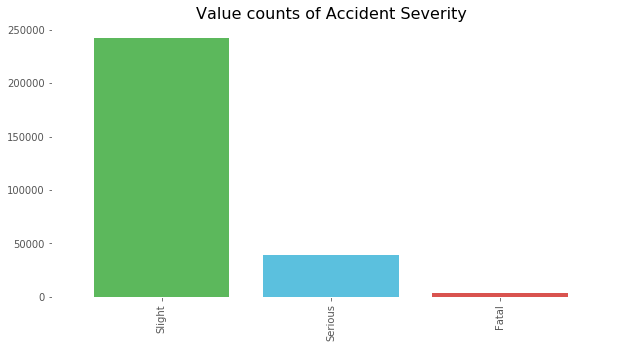

In [54]:
data['accident_severity'].replace(to_replace=[3.0,2.0,1.0], value=["Slight","Serious","Fatal"],inplace=True)
ycounts = data['accident_severity'].value_counts()
ycounts.plot(kind="bar", figsize = (10,5), width = 0.8, color = (["#5cb85c","#5bc0de","#d9534f"]), tick_label = False)
plt.title('Value counts of Accident Severity', size = 16)
ax1=plt.axes()
ax1.set_facecolor('white')

The imbalance means I will need to figure out a way to deal with it for the model building, which will be done later. 
At the same time the dataset still contains 53 variables to potentially build the model with. For most cases that number is pretty high and can lead to overfitting. Just by observing some of the attributes here, we can already tell that some of the variables will not be of use to our model. One example of that would be the area of the police force that responded to the accident, as that variable comes into effect only after the incident already took place.
Therefore, I will also do some feature selection and pick the most correlated variables that correspond to accident severity for the model. 
Overall the dataset is in good shape. All of the issues above will be adressed in the following sections.

# Sources

1. Grace Higgins (2019, November 03). Two Cars In The Entire State Of Ohio Yet They Still Collided. Retrieved August 24, 2020, from https://insidetonight.com/two-cars-in-the-entire-state-of-ohio-yet-they-still-collided/
2. Bertoncello, M.; Wee, D. (2018, February 14). Ten ways autonomous driving could redefine the automotive world. Retrieved August 24, 2020, from https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/ten-ways-autonomous-driving-could-redefine-the-automotive-world
3. data.gov.uk dataset on road accidents between 1979 and 2015 - https://www.kaggle.com/akshay4/road-accidents-incidence